In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Шаг 1 - мусорных строк нет..., поэтому я убираю регионы и перехожу сразу к странам
econ_df = pd.read_csv('WB_WDI_NY_GDP_MKTP_PP_KD.csv', skiprows=list(range(1, 49)))
military_df = pd.read_csv('WB_WDI_MS_MIL_XPND_CD.csv', skiprows=list(range(1, 18)))

def df_describe (data):
    print(f'Размер {data.shape} (строки, столбцы)\n')
    print(f'Типы данных {data.dtypes}\n')
    print('3 строки для примера: \n', data.sample(3))

print('Таблица про экономические показатели\n')
df_describe(econ_df)
print('Таблица про военные расходы\n')
df_describe(military_df)

Таблица про экономические показатели

Размер (8413, 45) (строки, столбцы)

Типы данных STRUCTURE                  object
STRUCTURE_ID               object
ACTION                     object
FREQ                       object
FREQ_LABEL                 object
REF_AREA                   object
REF_AREA_LABEL             object
INDICATOR                  object
INDICATOR_LABEL            object
SEX                        object
SEX_LABEL                  object
AGE                        object
AGE_LABEL                  object
URBANISATION               object
URBANISATION_LABEL         object
UNIT_MEASURE               object
UNIT_MEASURE_LABEL         object
COMP_BREAKDOWN_1           object
COMP_BREAKDOWN_1_LABEL     object
COMP_BREAKDOWN_2           object
COMP_BREAKDOWN_2_LABEL     object
COMP_BREAKDOWN_3           object
COMP_BREAKDOWN_3_LABEL     object
TIME_PERIOD                 int64
OBS_VALUE                 float64
AGG_METHOD                 object
AGG_METHOD_LABEL           ob

In [7]:
#Шаг 2 - в заданиях дальше не фигурирует таблица про военные расходы, поэтому и в коде она чудесным образом и не используется
g7_countries = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']
brics_countries = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']
df = econ_df
df = (df[(df['REF_AREA'].isin(g7_countries)) | (df['REF_AREA'].isin(brics_countries))].loc[:,
      ['REF_AREA', 'REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE']]).reset_index(drop=True)

#сделаю отдельную функцию для добавления блоков
def bloc_maker (iso_code):
    g7_countries = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']
    brics_countries = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']
    if iso_code in g7_countries:
        return 'G7'
    if iso_code in brics_countries:
        return 'BRICS'
df['Block'] = df['REF_AREA'].apply(bloc_maker)
df

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE,Block
0,BRA,Brazil,1990,1.884169e+12,BRICS
1,CAN,Canada,1990,1.120802e+12,G7
2,CHN,China,1990,1.892271e+12,BRICS
3,FRA,France,1990,2.252131e+12,G7
4,DEU,Germany,1990,3.365858e+12,G7
...,...,...,...,...,...
415,JPN,Japan,2024,5.714946e+12,G7
416,RUS,Russian Federation,2024,6.088997e+12,BRICS
417,ZAF,South Africa,2024,8.704202e+11,BRICS
418,GBR,United Kingdom,2024,3.635610e+12,G7


In [9]:
#Шаг 3 –  очистка данных частично была выполнена в предудыщем шаге. Здесь только работа с NaN
df.isna().any()
#В данных нет NaN - шаг выполнен еще до его выполнения

REF_AREA          False
REF_AREA_LABEL    False
TIME_PERIOD       False
OBS_VALUE         False
Block             False
dtype: bool

In [11]:
#Шаг 4 - первые два пункта задания пропущены тк они нелогичные и ни к чему не ведут
df = df.pivot_table(index='Block', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum')
#теперь все в триллионах ура
df = (df/1e12).round(2)
df

TIME_PERIOD,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Block,,,,,,,,,,,,,,,,,,,,,
BRICS,10.51,10.50,10.28,10.49,10.71,11.20,11.69,12.27,12.63,13.41,...,38.79,40.79,43.08,45.53,47.62,47.29,51.14,52.98,56.11,58.97
G7,26.56,26.89,27.46,27.77,28.62,29.34,30.14,31.11,32.01,33.03,...,42.57,43.25,44.26,45.18,45.96,44.02,46.56,47.77,48.65,49.48


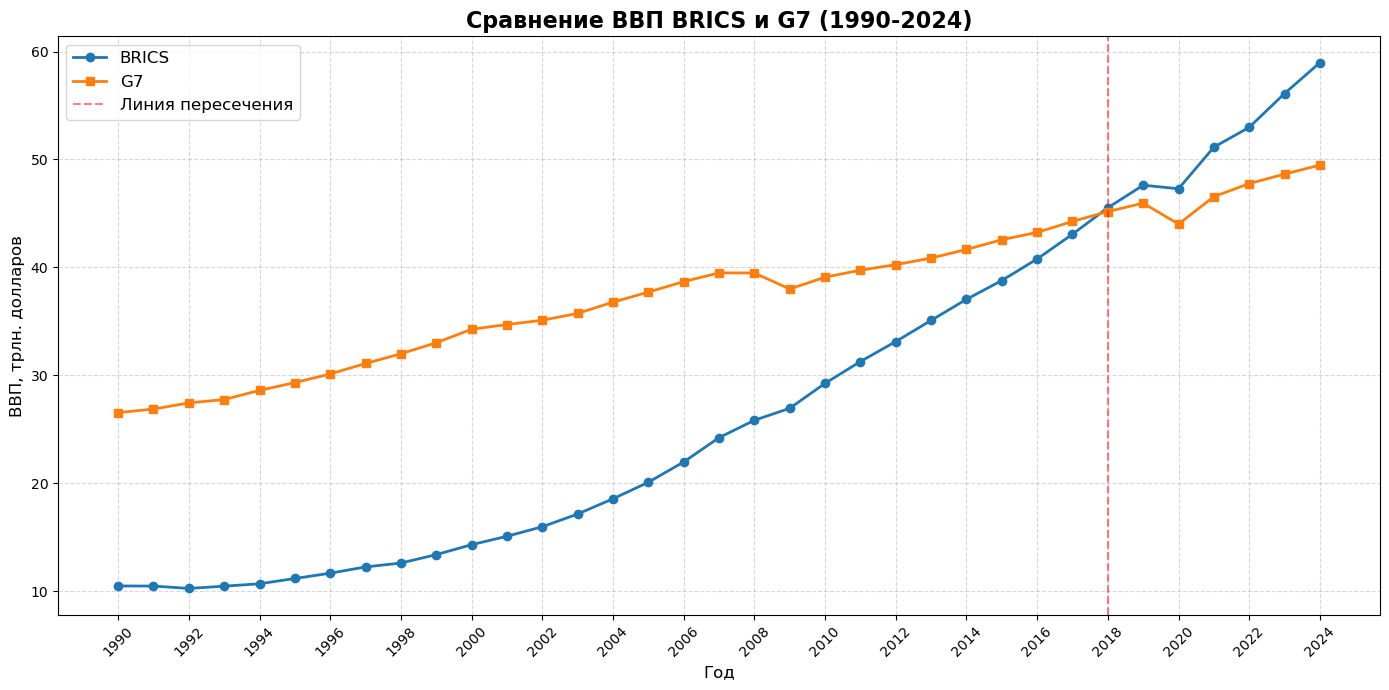

In [13]:
#Шаг 5
#масштабный график
plt.figure(figsize=(14, 7))

# Для каждой строки строим график потому что пивот
for idx, block in enumerate(df.index):
    plt.plot(df.columns, df.loc[block], 
             marker='o' if idx == 0 else 's',
             linestyle='-',
             linewidth=2,
             label=block)

plt.axvline(x=2018, color='red', linestyle='--', alpha=0.5, linewidth=1.5,
           label='Линия пересечения')
plt.title('Сравнение ВВП BRICS и G7 (1990-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('ВВП, трлн. долларов', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df.columns[::2], rotation=45)
plt.tight_layout()
plt.show()

# Шаг 6: аналитический вывод
На основании анализа (построение графика) можно отметить, что суммарный ВВП по ППС изначальных стран BRICS превысил суммарный ВВП по ППС G7. \
Однако это не позволяет ни подтвердить, ни опровергнуть гипотезу о том, что экономическое влияние перетекает к странам BRICS, поскольку:
1. В анализ не включен ВВП по обменному курсу, где ситуация может быть (и в реальности наблюдается) другой
2. Экономическое влияние государств - способность государства влиять через свои экономические масштабы, политику и ресурсы на мировую и региональную экономику, рост, торговлю, экспорт и импорт и тд. ВВП по ППС является составной частью  одного из факторов влияния, однако, в анализ не включено членство государства в международных организациях, контроль ресурсов, ВВП на душу населения и др факторы. 

Тем не менее, можно заметить (хотя в идеале нужно строить регрессию), что совокупный ВВП BRICS сильно отставал от суммарного ВВП стран G7, однако, в 2018 году удалось перегнать ВВП G7. Можно отметить тренд на более высокие темпы роста стран BRICS и на увеличение разрыва между блоками, но теперь увеличение отставания показателей суммарного ВВП по ППС G7 от BRICS, а не наоборот как было до 2018 года.\
Таким образом, в анализе используется лишь составная часть одного из нескольких факторов экономического влиния государств, что не позволяет сделать определенный вывод о возросшем экономическом влиянии стран BRICS.


In [ ]:
#Шаг 7 - как я понял нужно просто разные графики строить, но четко это не написано
#Линеный график - ну он выше... зачем его строить второй раз

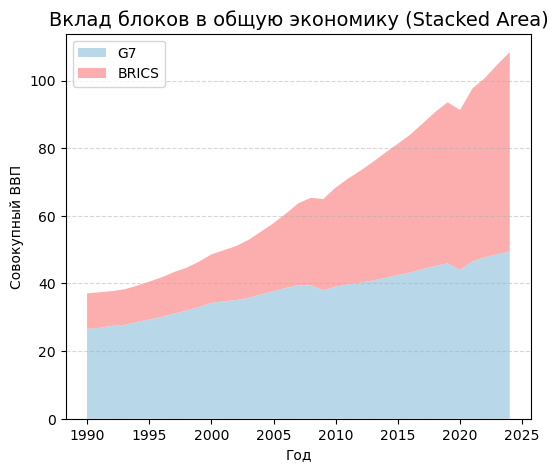

In [16]:
#Диаграмма с областями
plt.figure(figsize=(6, 5)) #не хочу чтобы нужно было листать

#сначала сделаем норм данные
brics_data = df.loc['BRICS'].values
g7_data = df.loc['G7'].values
years = df.columns

#рисуем области 
plt.stackplot(years,
              [g7_data, brics_data], 
              labels=['G7', 'BRICS'],
              colors=['#a6cee3', '#fb9a99'], 
              alpha=0.8)

plt.title('Вклад блоков в общую экономику (Stacked Area)', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Совокупный ВВП')
plt.legend(loc='upper left') #положение легенды (все легенды учаться в мгимо)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

/var/folders/vr/pv5sdy_x4rsf_np0ff83ndx40000gn/T/ipykernel_51665/2179338835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['gdp'] = (df_2023['gdp']/1e12).round(2)


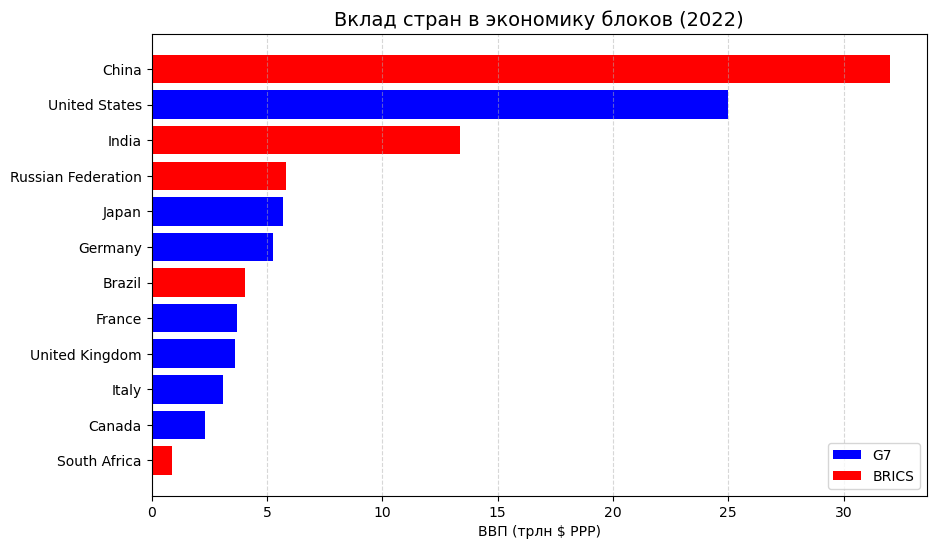

In [18]:
#Столбчатая диграмма
#В задании указан 2023, поэтому 2022 в коде-примере заменил заменил на 2023

#сначала подготовим данные
df_nonpiv = (econ_df[(econ_df['REF_AREA'].isin(g7_countries)) | (econ_df['REF_AREA'].isin(brics_countries))].loc[:,
      ['REF_AREA', 'REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE']]).reset_index(drop=True)
df_nonpiv['Block'] = df_nonpiv['REF_AREA'].apply(bloc_maker)
df_nonpiv.columns = ['iso_code', 'country', 'year', 'gdp', 'bloc']
df_2023 = df_nonpiv[df_nonpiv['year'] == 2023]
df_2023['gdp'] = (df_2023['gdp']/1e12).round(2)

#сортируем для красоты
df_2023 = df_2023.sort_values('gdp', ascending=True)

#рисуем графикиd
plt.figure(figsize=(10, 6))

#цвета в зависимости от блока
colors = df_2023['bloc'].map({'G7': 'blue', 'BRICS': 'red'})

plt.barh(df_2023['country'], df_2023['gdp'], color=colors)

#добавляем легенду вручную (т.к. barh не делает это автоматически для групп цветов)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='G7'),
                   Patch(facecolor='red', label='BRICS')]
plt.legend(handles=legend_elements)

plt.title('Вклад стран в экономику блоков (2022)', fontsize=14)
plt.xlabel('ВВП (трлн $ PPP)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()
